# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 7. Решающие деревья и случайные леса.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.




**Баллы за задание:**

* Задача 1 &mdash; 15 баллов
* Задача 2 &mdash; 50 баллов
* Задача 3 &mdash; 30 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad7
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import graphviz

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/trees.html">ноутбук</a> с занятия по решающим деревьям.

---
### Задача 1.

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно признака $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

---
### Задача 2.

Рассмотрим данные из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html" target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

In [123]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [124]:
train, other = train_test_split(data, test_size=0.4)
test, valid = train_test_split(other, test_size=0.5)
print(train.shape, test.shape, valid.shape)

(438, 16) (146, 16) (147, 16)


Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [125]:
categorial_features = ['season', 'holiday', 'workingday', 'weathersit']
real_features = ['mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'
train = train[categorial_features + real_features + [target_feature]]

train = train.loc[train['hum'] > 0.3]
train = train.loc[train['windspeed'] < 0.4]

Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сохранить визуализацию в html и отправить ее вместе с решением.*

In [150]:
model = DecisionTreeRegressor(
    random_state=42,
    max_depth=3,
    criterion='squared_error')
y_train = train[target_feature]
x_train = train.drop(columns=target_feature)
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [151]:
valid = valid[categorial_features + real_features + [target_feature]]
valid = valid.loc[valid['hum'] > 0.3]
valid = valid.loc[valid['windspeed'] < 0.4]
y_valid = valid[target_feature]
x_valid = valid.drop(columns=target_feature)

In [152]:
pred = model.predict(x_valid)
print('mse:', metrics.mean_squared_error(y_valid, pred) ** 0.5)
print('mae:', metrics.mean_absolute_error(y_valid, pred))
print('mape:', metrics.mean_absolute_percentage_error(y_valid, pred))

mse: 1285.1508355790784
mae: 1051.7304737677905
mape: 0.26491152587126054


In [166]:
img = graphviz.Source(export_graphviz(
    model, impurity=False, out_file=None,
    feature_names=x_train.columns, filled=True, rounded=True, special_characters=True))
img.render(filename='tree')

'tree.pdf'

Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

In [154]:
errors = {'mse':[], 'mae':[], 'mape':[]}
for depth in range(1, 30):
    model = DecisionTreeRegressor(
    random_state=42,
    max_depth=depth,
    criterion='squared_error')
    model.fit(x_train, y_train)
    pred = model.predict(x_valid)
    errors['mse'].append(metrics.mean_squared_error(y_valid, pred) ** 0.5)
    errors['mae'].append(metrics.mean_absolute_error(y_valid, pred))
    errors['mape'].append(metrics.mean_absolute_percentage_error(y_valid, pred))

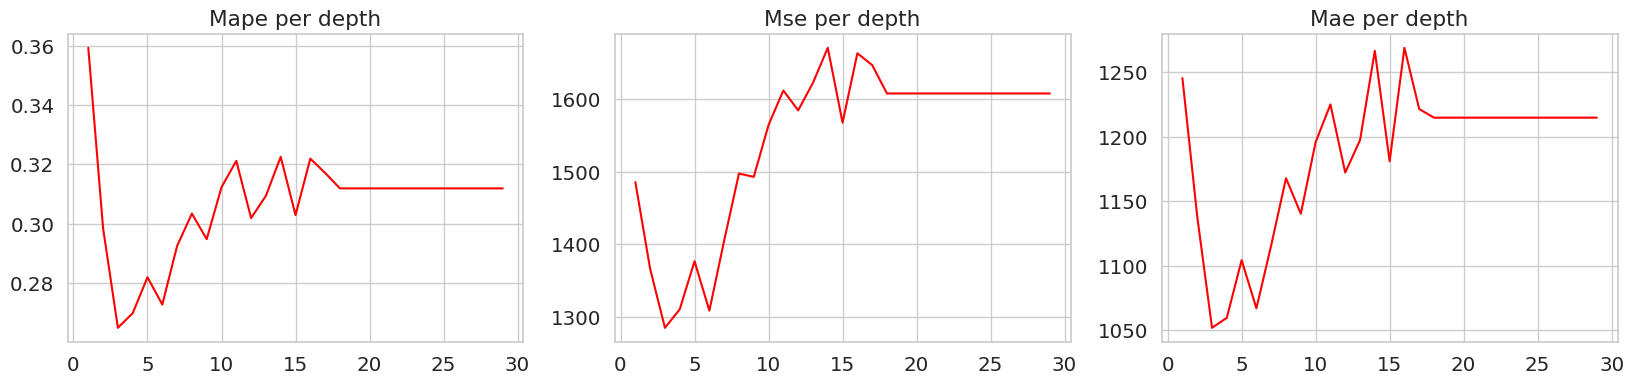

In [155]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.title('Mape per depth')
plt.plot(range(1, 30), errors['mape'], color='r')
plt.subplot(1, 3, 2)
plt.title('Mse per depth')
plt.plot(range(1, 30), errors['mse'], color='r')
plt.subplot(1, 3, 3)
plt.title('Mae per depth')
plt.plot(range(1, 30), errors['mae'], color='r')

Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

In [156]:
depth = 3
errors = {'mse':[], 'mae':[], 'mape':[]}
for leaves in range(1, 100):
    model = DecisionTreeRegressor(
    random_state=42,
    max_depth=depth,
    criterion='squared_error',
    min_samples_leaf=leaves)
    model.fit(x_train, y_train)
    pred = model.predict(x_valid)
    errors['mse'].append(metrics.mean_squared_error(y_valid, pred) ** 0.5)
    errors['mae'].append(metrics.mean_absolute_error(y_valid, pred))
    errors['mape'].append(metrics.mean_absolute_percentage_error(y_valid, pred))

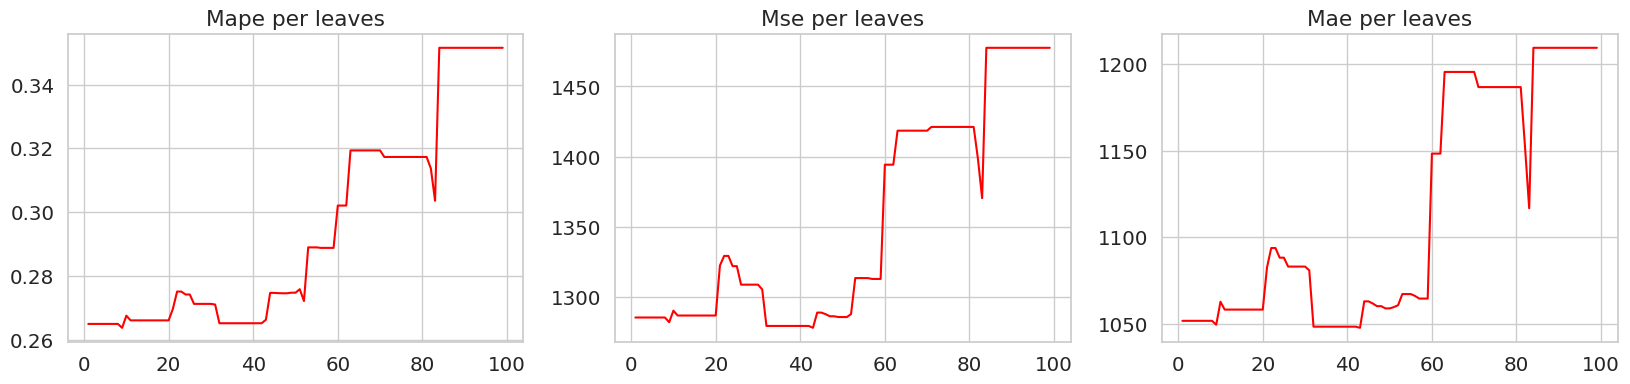

In [157]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.title('Mape per leaves')
plt.plot(range(1, 100), errors['mape'], color='r')
plt.subplot(1, 3, 2)
plt.title('Mse per leaves')
plt.plot(range(1, 100), errors['mse'], color='r')
plt.subplot(1, 3, 3)
plt.title('Mae per leaves')
plt.plot(range(1, 100), errors['mae'], color='r')

Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

In [167]:
leaves = 40
model = DecisionTreeRegressor(
    random_state=42,
    max_depth=depth,
    criterion='squared_error',
    min_samples_leaf=leaves)
model.fit(x_train, y_train)
img = graphviz.Source(export_graphviz(
    model, impurity=False, out_file=None,
    feature_names=x_train.columns, filled=True, rounded=True, special_characters=True))
img.render(filename='optree')

'optree.pdf'

In [159]:
test = test[categorial_features + real_features + [target_feature]]
y_test = test[target_feature]
x_test = test.drop(columns=target_feature)

In [160]:
pred = model.predict(x_test)
print('mse:', metrics.mean_squared_error(y_test, pred) ** 0.5)
print('mae:', metrics.mean_absolute_error(y_test, pred))
print('mape:', metrics.mean_absolute_percentage_error(y_test, pred))

mse: 1421.8704184474764
mae: 1184.1983261016853
mape: 0.32426817040905265


Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

<Axes: title={'center': 'Importance of params'}, xlabel='feature', ylabel='importance coeff'>

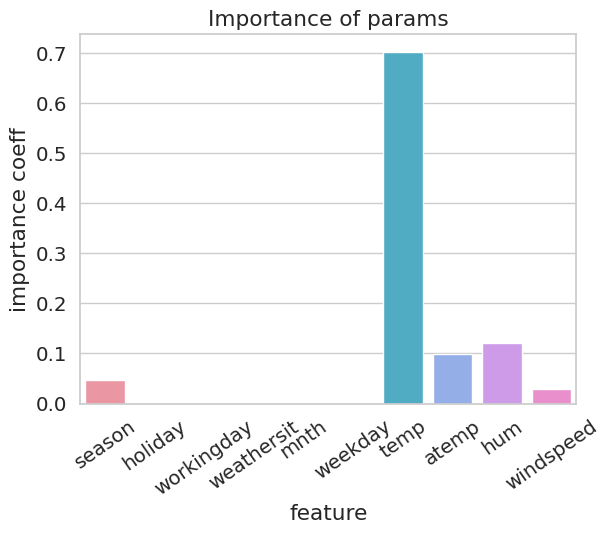

In [161]:
feature_importances = pd.DataFrame()
feature_importances['feature'] = x_test.columns
feature_importances['importance coeff'] = model.feature_importances_
plt.title('Importance of params')
plt.xticks(rotation=35)
sns.barplot(
    data=feature_importances,
    x='feature',
    y='importance coeff')

Сделайте выводы.

При глубине > 5 происходит "переобучение".
Результат во многом зависит от параметра температуры.
Многие параметры имеют нулевой вес.
Результат с удалением выбросов и без довольно сильно отличается, те выбросы сильно влияют на метрику ошибки.

---
### Задача 3.

Для данных из предыдущей части обучите случайный лес на 500 деревьев.

In [142]:
estimators_number = 500
model = RandomForestRegressor(n_estimators=estimators_number)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500)

In [143]:
pred = model.predict(x_valid)
print('mse:', metrics.mean_squared_error(y_valid, pred) ** 0.5)
print('mae:', metrics.mean_absolute_error(y_valid, pred))
print('mape:', metrics.mean_absolute_percentage_error(y_valid, pred))

mse: 1214.6036592695862
mae: 998.909698630137
mape: 0.24650929828622464


Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

In [168]:
errors = {'mset':[], 'maet':[], 'mapet':[], 'msev':[], 'maev':[], 'mapev':[]}
for i in range(500):
        predt = model.estimators_[0].predict(x_train)
        predv = model.estimators_[0].predict(x_valid)
        for j in range(1, i+1):
            predt += model.estimators_[j].predict(x_train)
            predv += model.estimators_[j].predict(x_valid)
        predt /= (i+1)
        predv /= (i+1)
        errors['mset'].append(metrics.mean_squared_error(y_train, predt) ** 0.5)
        errors['maet'].append(metrics.mean_absolute_error(y_train, predt))
        errors['mapet'].append(metrics.mean_absolute_percentage_error(y_train, predt))
        errors['msev'].append(metrics.mean_squared_error(y_valid, predv) ** 0.5)
        errors['maev'].append(metrics.mean_absolute_error(y_valid, predv))
        errors['mapev'].append(metrics.mean_absolute_percentage_error(y_valid, predv))

green - valid, red - train


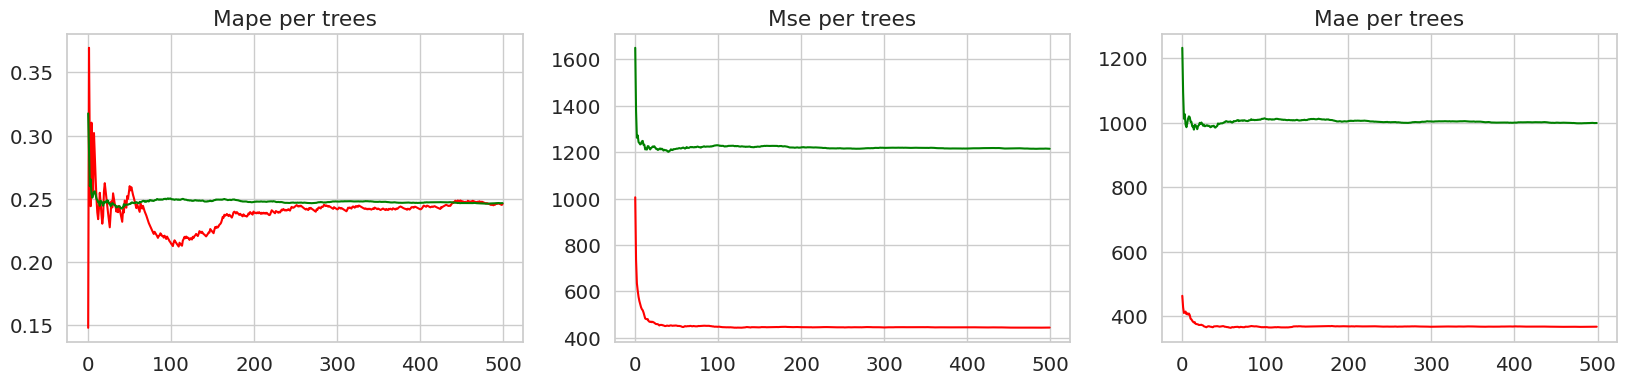

In [146]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 3, 1)
plt.title('Mape per trees')
plt.plot(range(500), errors['mapet'], color='r')
plt.plot(range(500), errors['mapev'], color='g')
plt.subplot(1, 3, 2)
plt.title('Mse per trees')
plt.plot(range(500), errors['mset'], color='r')
plt.plot(range(500), errors['msev'], color='g')
plt.subplot(1, 3, 3)
plt.title('Mae per trees')
plt.plot(range(500), errors['maet'], color='r')
plt.plot(range(500), errors['maev'], color='g')
print('green - valid, red - train')

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`. 

<Axes: title={'center': 'Importance of params'}, xlabel='feature', ylabel='importance coeff'>

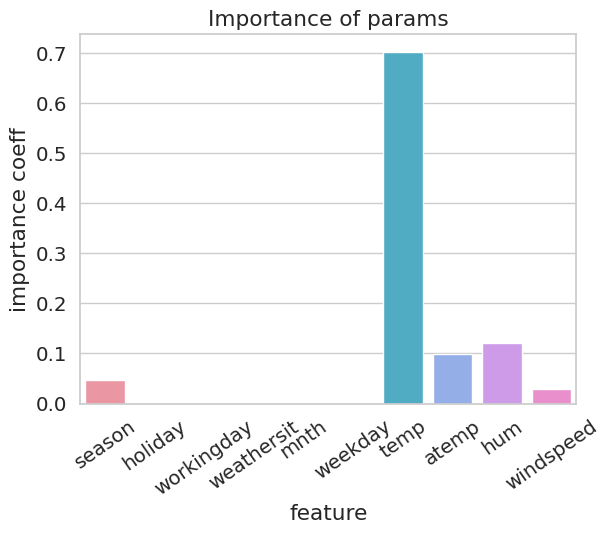

In [162]:
feature_importances = pd.DataFrame()
feature_importances['feature'] = x_test.columns
feature_importances['importance coeff'] = model.feature_importances_
plt.title('Importance of params')
plt.xticks(rotation=35)
sns.barplot(
    data=feature_importances,
    x='feature',
    y='importance coeff')

Сделайте выводы.

Решающий лес показал себя лучше всех моделей

Чем больше деревьев используется в модели, тем меньше показатели ошибки.

Важность параметров изменилась по сравнению с одним решающим деревом. Теперь нет параметров, вообще не вносящих вклад. Лидеры остались те же.